# Session 1: HPC and the Julia Framework

**OBJECTIVE**: Confirm Julia framework and Base speed
- [ ] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [ ] KR2: Demonstrate that Julia is able to determine constants in codes.
- [ ] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro for the given grid size `n`.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

In [66]:
using Pkg
Pkg.activate(".") #activating the local Package environment, for this Session

##adding packages used in this Session

  Activating environment at `~/Documents/GitHub/Phys215-202122-1/01-HPC/Project.toml`


## KR1
Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.

In [62]:
@code_warntype 3^2

Variables
  #self#::Core.Const(^)
  x::Int64
  p::Int64

Body::Int64
1 ─ %1 = Base.power_by_squaring(x, p)::Int64
└──      return %1


In [63]:
@code_warntype 3.0^(2.0)

Variables
  #self#::Core.Const(^)
  x::Float64
  y::Float64
  z::Float64

Body::Float64
1 ─       nothing
│   %2  = Base.cconvert(Base.Math.Float64, x)::Float64
│   %3  = Base.cconvert(Base.Math.Float64, y)::Float64
│   %4  = Base.unsafe_convert(Base.Math.Float64, %2)::Float64
│   %5  = Base.unsafe_convert(Base.Math.Float64, %3)::Float64
│         (z = $(Expr(:foreigncall, "llvm.pow.f64", Float64, svec(Float64, Float64), 0, :(:llvmcall), :(%4), :(%5), :(%3), :(%2))))
│   %7  = Base.Math.isnan(z)::Bool
│   %8  = (x + y)::Float64
│   %9  = Base.Math.isnan(%8)::Bool
│   %10 = !%9::Bool
│   %11 = (%7 & %10)::Bool
└──       goto #3 if not %11
2 ─       Base.Math.throw_exp_domainerror(x)
3 ┄       return z


### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [ ] KR2: Demonstrate that Julia is able to determine constants in codes.
- [ ] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

## KR2
Demonstrate that Julia is able to determine constants in codes.

In [14]:
f(x) = log(10.0)*x

f (generic function with 1 method)

In [26]:
@code_llvm f(4.0)

;  @ In[14]:1 within `f'
define double @julia_f_2169(double %0) {
top:
; ┌ @ float.jl:332 within `*'
   %1 = fmul double %0, 0x40026BB1BBB55516
; └
  ret double %1
}


In [24]:
f₁(x) = x*log(x)

f₁ (generic function with 1 method)

In [27]:
@code_llvm f₁(4.0)

;  @ In[24]:1 within `f₁'
define double @"julia_f\E2\82\81_2171"(double %0) {
top:
  %1 = call double @j_log_2173(double %0)
; ┌ @ float.jl:332 within `*'
   %2 = fmul double %1, %0
; └
  ret double %2
}


### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [ ] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

# KR3
Demonstrate Julia's type-inference and multiple dispatch.

### Avoid overloading existing functions
Checking if the intended function is pre-existing in the loaded environment.
The system can recognize it once the cell is run below.

In [98]:
?what

search: what Cwchar_t



No documentation found.

`what` is a `Function`.

```
# 6 methods for generic function "what":
[1] what(x::String) in Main at In[70]:2
[2] what(x::AbstractFloat) in Main at In[70]:4
[3] what(x::Int64) in Main at In[70]:5
[4] what(x::Complex) in Main at In[70]:6
[5] what(x::Number) in Main at In[70]:3
[6] what(x) in Main at In[70]:1
```


In [106]:
what(x) = "some type $(typeof(x))" #most general case
what(x::String) = "a string"
what(x::Number) = "a number"
what(x::Real) = "a real number"
what(x::Rational) = "a rational number"
what(x::Int) = "an integer"
what(x::Complex) = "a complex number"

what (generic function with 8 methods)

Notice the difference between a Julia function and a Julia method.

In [71]:
println("π is $(what(π)).")
println("4.0 is $(what(4.0)).")
println("4 is $(what(4)).")
println("\"x\" is $(what("x")).")
println("\'x\' is $(what('x')).")
println("4+2im is $(what(4+2im)).")

π is a number.
4.0 is a float.
4 is an integer.
"x" is a string.
'x' is some type Char.
4+2im is a complex number.


### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [x] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [ ] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

## KR3
Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.

In [107]:
function my_sum(x::Vector)
    s = zero(eltype(x)) ##important to use consistent zero type, eltype()=?
    for el in x
        s += el
    end
    return s
end

my_sum (generic function with 1 method)

### Use `@time` macro

Let's check the time it takes to run `my_sum()`.

In [108]:
x = rand(10_000_000);

Notice the semicolon.

In [101]:
@time my_sum(x)

  0.033225 seconds (1 allocation: 16 bytes)


4.99987203508073e6

Notice the compilation time appearing on the first time the function is used.

In [101]:
@time my_sum(x)

  0.033225 seconds (1 allocation: 16 bytes)


4.99987203508073e6

**Using `Base.sum()`**

In [97]:
@time sum(x) #using the Base.sum(::Vector) function

  0.010487 seconds (1 allocation: 16 bytes)


4.999545444025083e6

In [97]:
@time sum(x) #using the Base.sum(::Vector) function

  0.010487 seconds (1 allocation: 16 bytes)


4.999545444025083e6

### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [x] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [x] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [ ] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

## Avoid global variables in Julia 😱

The **use of global variables [is highly discouraged in Julia](https://docs.julialang.org/en/v1/manual/performance-tips/#Avoid-global-variables)**.
It interferes with the type inferencing system `LLVM-IR` within its system.

BTW: Unicodes in Julia is available [here](https://docs.julialang.org/en/v1/manual/unicode-input/).

## KR4
Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.

In [114]:
include("Mandelbrot.jl")

mandelbrot

In [115]:
?mandelbrot

search: mandelbrot



```
mandelbrot( c )
```

Computes the number of evaluations of the following equation before the resulting complex number `z` beginning with `z=c`.

  * Input: `c::Number`
  * Output: `itrMax::??`

### Questions

  * What do you think is the output type of this function?
  * Which of the part of the code determines the type?

Sometimes forcing the type of output can be an advantage.


Loading the plotting function in `PlotMandelbrot.jl`..

In [129]:
include("PlotMandelbrot.jl")

plotMandelbrot (generic function with 2 methods)

In [130]:
?plotMandelbrot

search: plotMandelbrot plotMandel



```
plotMandel( xrange::Tuple{Float64,Float64}, yrange::Tuple{Float64,Float64}; n=100 )
```

Plots the results of `mandelbrot()` function using the `heatmap()` function.

  * Must load `Plots` module.

**Special case**

```
plotMandelbrot( vrange::Tuple{Float64,Float64}; n=100 ) = plotMandel( vrange, vrange; n )
```


In [133]:
## must load Plots module..
using Plots

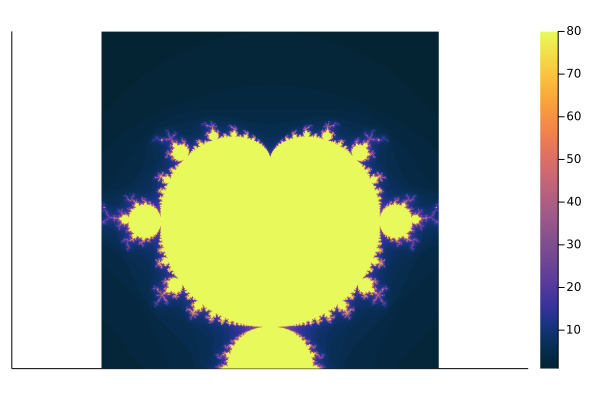

In [135]:
plotMandelbrot( (-1.0,1.0); n=1_000 )

### Zooming in interesting areas

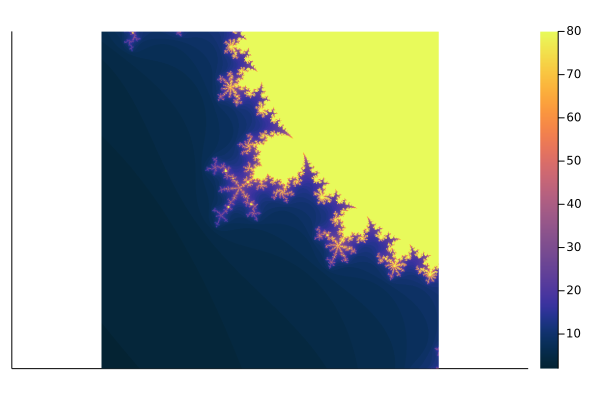

In [137]:
plotMandelbrot( (-0.90,-0.27); n=1_000 )

### So far..
- [x] KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.
- [x] KR2: Demonstrate that Julia is able to determine constants in codes.
- [x] KR3: Demonstrate Julia's type-inference and multiple dispatch.
- [x] KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.
- [x] KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.
- [ ] KR5: Plot of the time it takes for the function to run using `@time` macro for the given grid size `n`.
- [ ] KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

# Fin.